In [5]:
import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *
from sklearn.preprocessing import StandardScaler

In [6]:
df_gaming = pd.read_csv('../data/gaming.csv')
df_satis = pd.read_csv('../data/SatisfactoryGame.csv')
df_marauders = pd.read_csv('../data/MaraudersGame.csv')
df_tarkov = pd.read_csv('../data/EscapefromTarkov.csv')
df_politics = pd.read_csv('../data/politics.csv')
print(df_tarkov['comment_text'])

0       Need more of this type of content on the sub! ...
1       Gotta count the money. Gotta make sure it's al...
2       More tarkov adventures of this guy o7: https:/...
3       OK. You should add a part where another PMC tr...
4       Absolutely hilarious. A perfect ending would h...
                              ...                        
9485    I have 1300 hours in the game and have never s...
9486    I found one in a med bag died 5 mins later to ...
9487    nice. Good scav karma pays off. \nFew hours ag...
9488    First scav run of the wipe i literally spawned...
9489                                           ...ok cool
Name: comment_text, Length: 9490, dtype: object


In [8]:
# embed_comments(df1['comment_text'])
#two_dims(df1['comment_text'])
#tarkov = embed_comments(df_tarkov['comment_text'])
#marauders = embed_comments(df_marauders['comment_text'])
#satis = embed_comments(df_satis['comment_text'])
politics = embed_comments(df_politics['comment_text'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


([[-1.9642215,
   -5.585706,
   -5.628944,
   3.0003872,
   -1.9584322,
   -0.48401242,
   -2.2278118,
   -3.831693,
   -5.548235,
   -6.2460995,
   9.842935,
   -0.08872498,
   -5.922522,
   -4.8742256,
   -4.6164308,
   -7.9059997,
   -0.76745224,
   -4.9524484,
   -3.8828657,
   1.7159585,
   -1.366721,
   0.06541418,
   -1.3102309,
   1.6192118,
   -7.0646963,
   9.803122,
   -3.2178721,
   -6.4015565,
   -1.8290374,
   -5.5039916,
   -5.9526124,
   5.7437396,
   3.380642,
   4.817475,
   -2.0229166,
   1.3970003,
   -0.31965294,
   -1.4061742,
   -1.0475109,
   1.4492798,
   7.840842,
   10.807981,
   11.100323,
   4.0019417,
   9.685304,
   -3.216036,
   -4.481926,
   -0.026117561,
   -1.4957432,
   -2.621161,
   -5.0351753,
   -0.5861518,
   1.7064252,
   6.314528,
   -0.40449774,
   5.7789025,
   -2.8803976,
   -0.3013517,
   6.334383,
   6.3450055,
   -1.4129105,
   4.228474,
   -3.6982887,
   15.933818,
   0.98862785,
   -4.0016465,
   7.4316816,
   -0.9111651,
   -2.6698823,

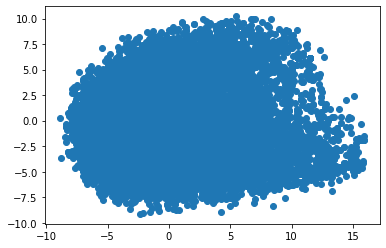

In [9]:
two_dims(politics, True)

In [11]:
def clustering_comments(comments, cluster_count, pre_emb = False, scaler = False): 
    '''Takes a collection of comments, maps it to a 2d/1d space and clusters them in a user-determined amount of groups.'''
    # imports 
    from sklearn.cluster import KMeans
    import numpy as np
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    from numpy import unique
    from numpy import where
    #load_data
    if not pre_emb:
        sentences = embed_comments(comments)
    else:
        sentences = comments
    # Initialize model
    model = KMeans(n_clusters=cluster_count)

    if scaler:
        sentences = scaler.fit_transform(sentences)
    # Fit model
    model.fit(sentences)

    #Make predictions
    yhat = model.predict(sentences)

    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(sentences[row_ix, 0], sentences[row_ix, 1])
        # show the plot
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


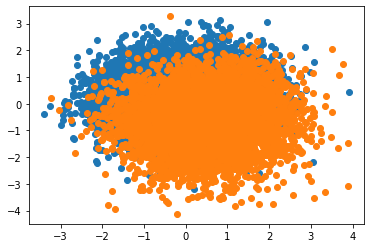

In [12]:
clustering_comments(politics, 2, True, StandardScaler())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


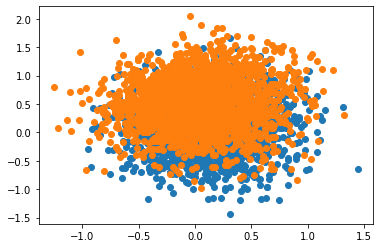

In [ ]:
clustering_comments(satis, 2, True, False)

In [ ]:
clustering_comments(tarkov, 2, True)

NameError: name 'tarkov' is not defined